___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install pandas==1.5.3


import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
df0 = pd.read_csv("Churn_Modelling.csv")
df=df0.copy()

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


"RowNumber": Veri setindeki satır numarasını temsil eder.

"CustomerId": Müşteri kimlik numarasını temsil eder.

"Surname": Müşterinin soyadını temsil eder.

"CreditScore": Müşterinin kredi puanını temsil eder.

"Geography": Müşterinin coğrafi konumunu (ülke) temsil eder.

"Gender": Müşterinin cinsiyetini temsil eder.

"Age": Müşterinin yağını temsil eder.

"Tenure": Müşterinin bankayla ilişkisini yıl cinsinden temsil eder.

"Balance": Müşterinin banka hesabındaki bakiyeyi temsil eder.

"NumOfProducts": Müşterinin sahip olduğu ürün sayısını temsil eder.

"HasCrCard": Müşterinin kredi kartına sahip olup olmadığını temsil eder.

"IsActiveMember": Müşterinin bankanın aktif üyesi olup olmadığını temsil eder.

"EstimatedSalary": Müşterinin tahmini maaşını temsil eder.

"Exited": Müşterinin ayrılıp ayrılmadığını (churn) temsil eder.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum().any()

False

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [7]:
df.shape

(10000, 14)

In [8]:
df.duplicated().sum()

0

In [9]:
# Modelleme için gereksiz olduğunu düşündüğümüz özellikleri kaldırma
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis=1)


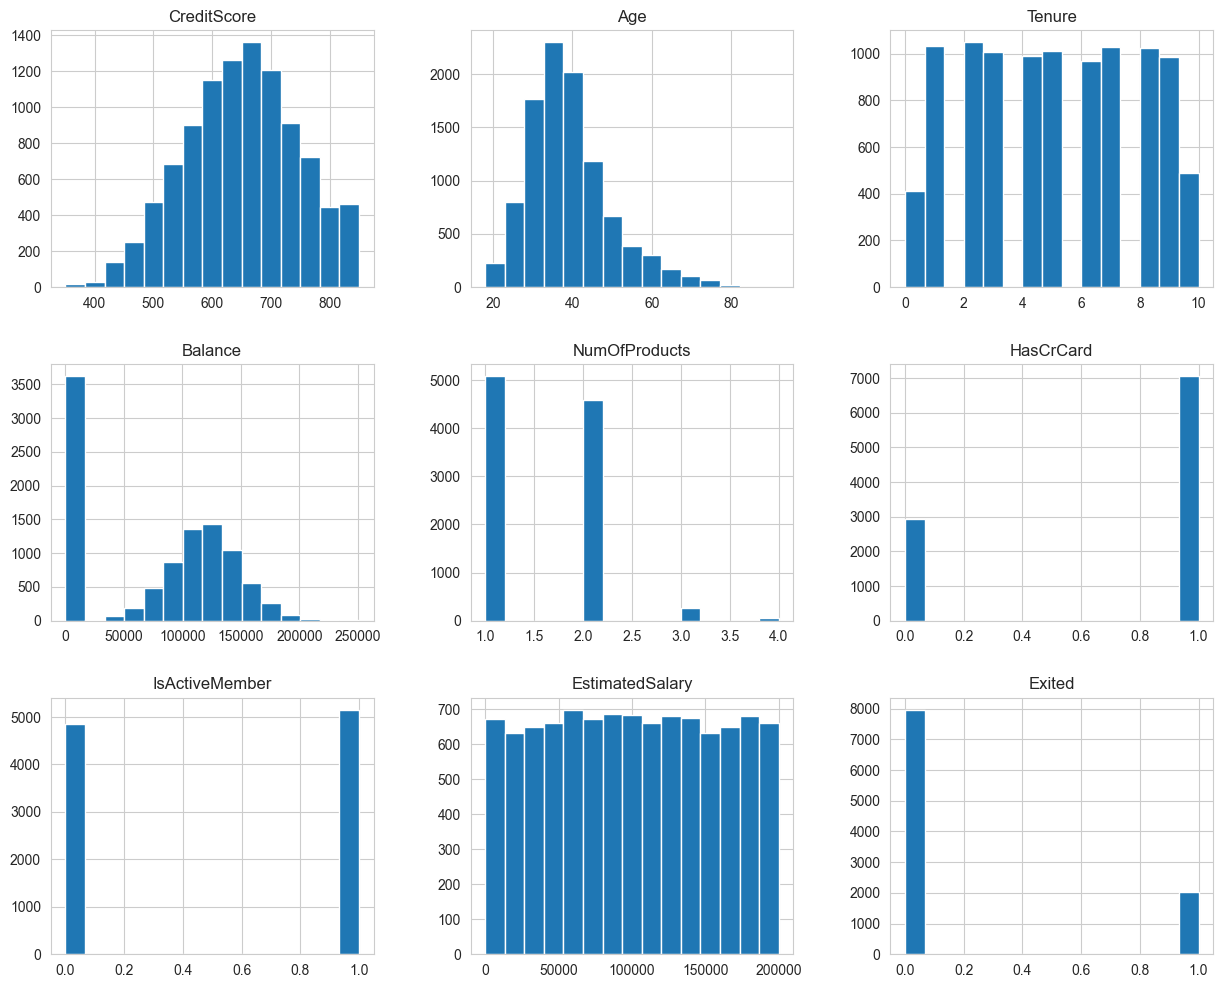

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
df.hist(figsize=(15,12), bins=15);
#her bir kategorik değişkenin "Exited" sütunuyla olan 
#ilişkisini görselleştirerek, her kategoriye ait "Exited" değerlerinin sayısal dağılımı



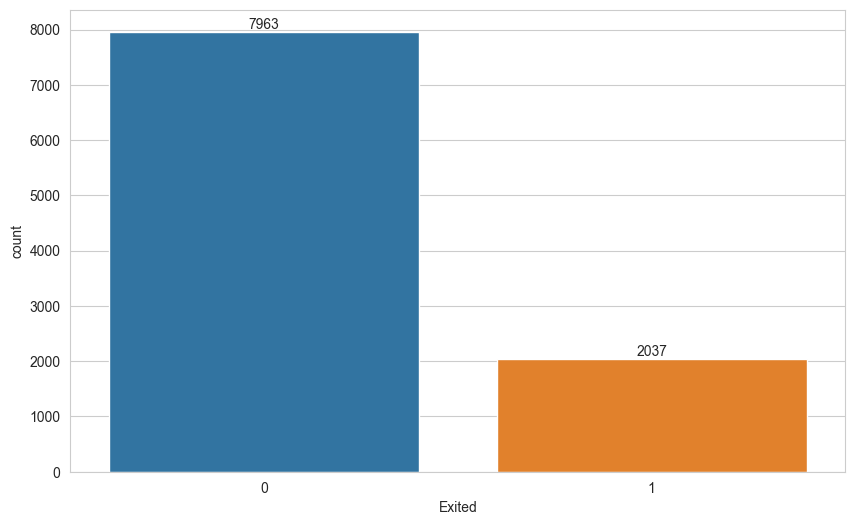

In [11]:
ax = sns.countplot(df["Exited"])
for i in ax.containers:
    ax.bar_label(i)
# Imbalance durum var 

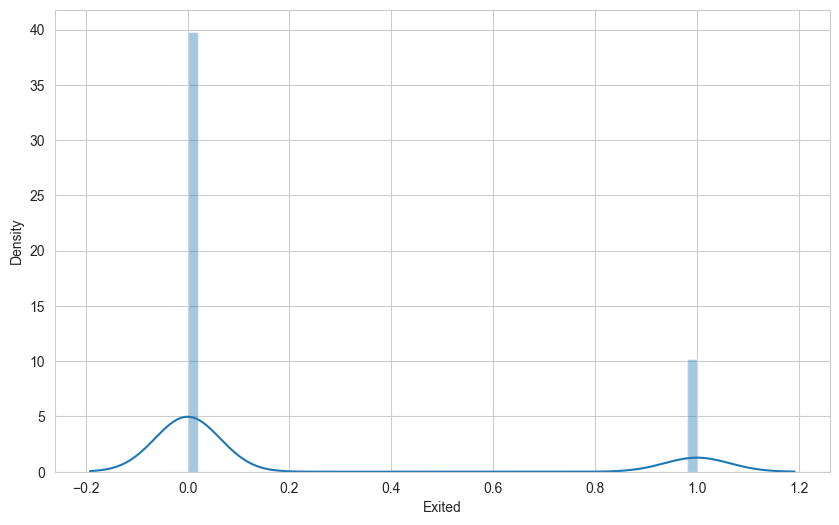

In [12]:
sns.distplot(df['Exited']);

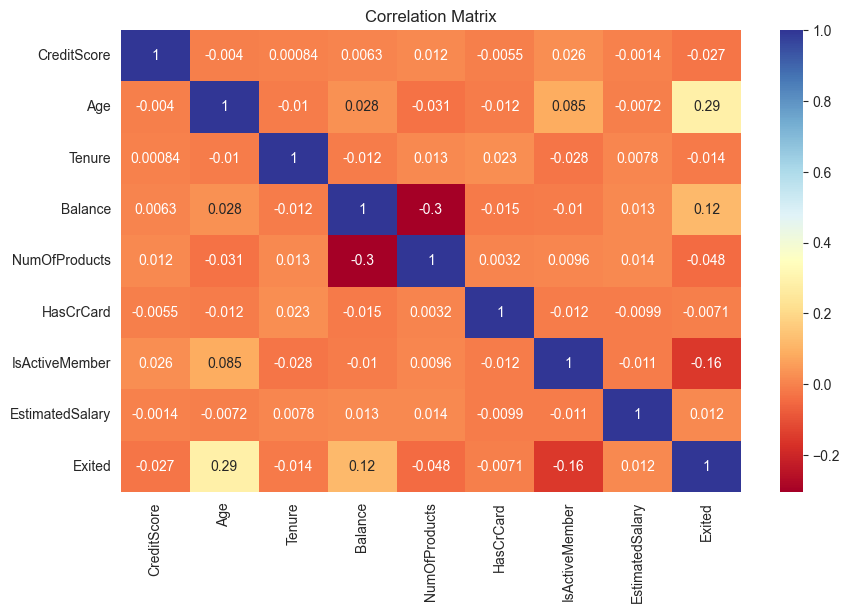

In [13]:
# Heatmap (Korelasyon matrisi)
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="RdYlBu")
plt.title("Correlation Matrix")
plt.show()

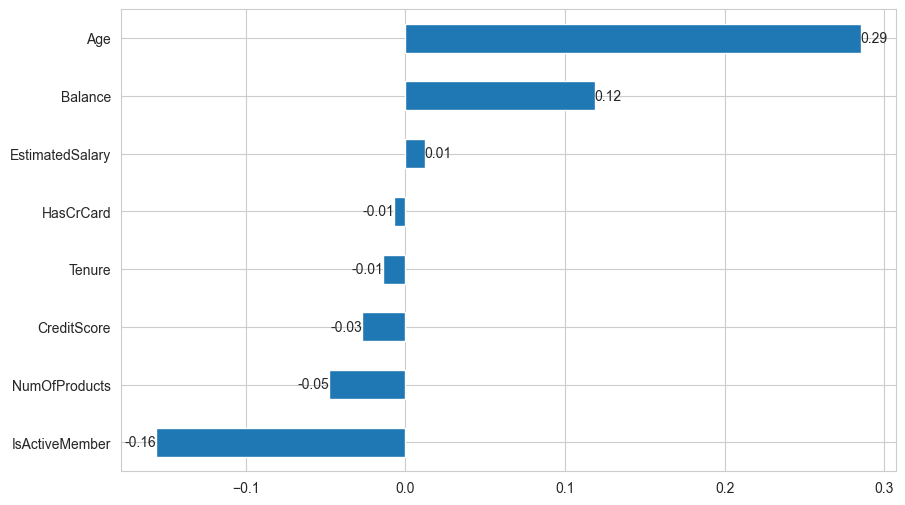

In [14]:
ax = df.corr()["Exited"][:-1].sort_values().plot.barh()
for i in ax.containers:
    ax.bar_label(i, fmt = "%.2f")

In [15]:
# Sınıf dağılımını kontrol etme
class_counts = df["Exited"].value_counts()
class_ratio = class_counts / len(df)
print("Sınıf Dağılımı:")
print(class_counts)
print(class_ratio)

#class_counts ve class_ratio ifadeleri, sınıfların sayısını ve oranlarını hesaplar ve ekrana basar.

Sınıf Dağılımı:
0    7963
1    2037
Name: Exited, dtype: int64
0   0.796
1   0.204
Name: Exited, dtype: float64


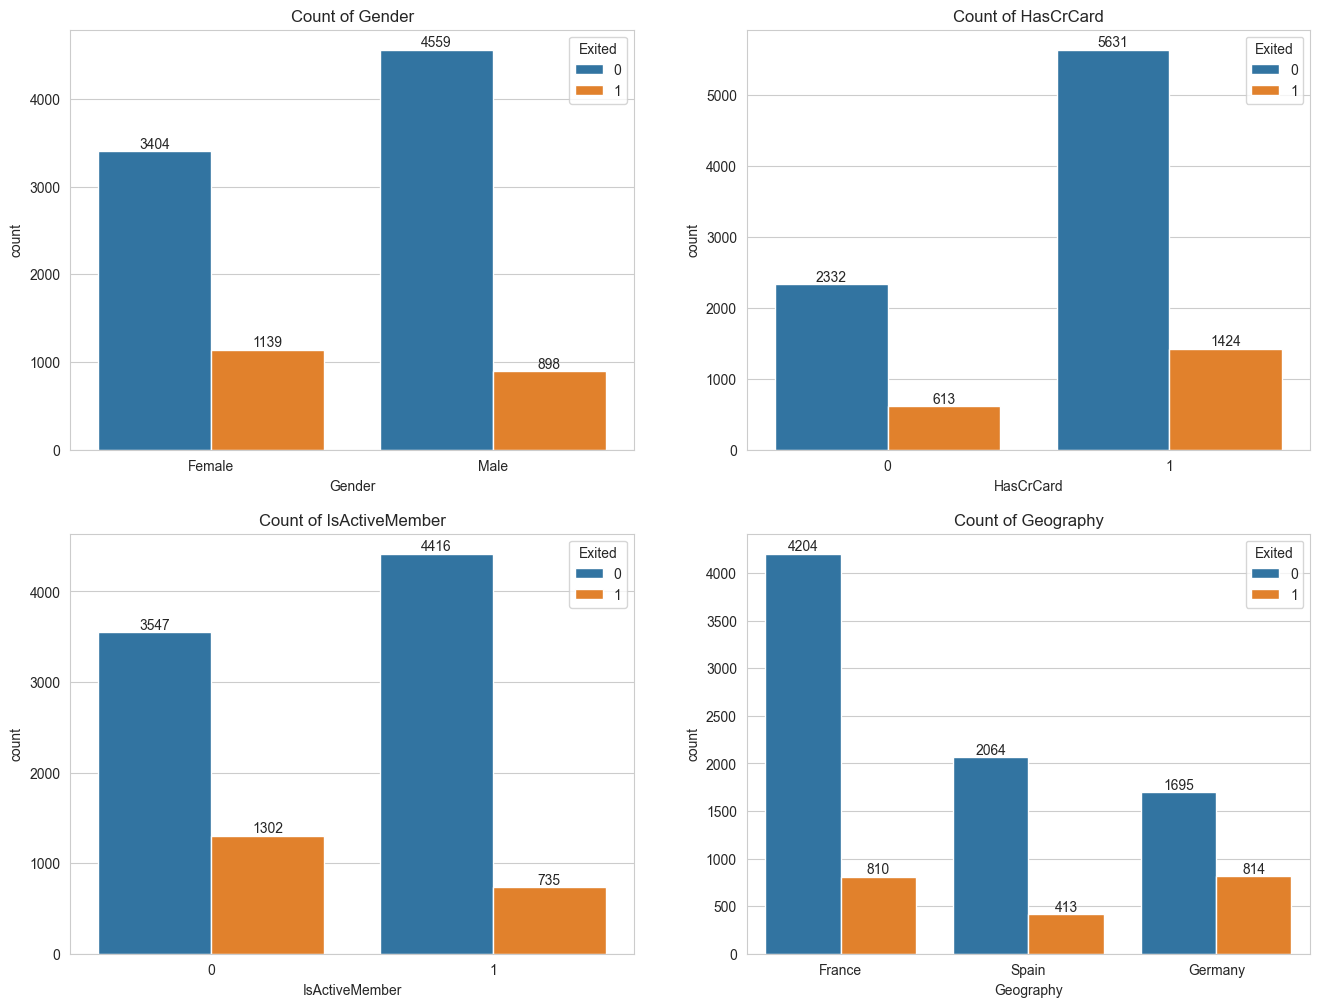

In [16]:
cat_list = ["Gender", "HasCrCard", "IsActiveMember", "Geography"]
index = 0
plt.figure(figsize=(16, 12))
for i in cat_list:
    index += 1
    plt.subplot(2, 2, index)
    ax = sns.countplot(data = df, x = i, hue = "Exited")
    for k in ax.containers:
        ax.bar_label(k)
    plt.title(f"Count of {i}")

In [17]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [18]:
transformer = make_column_transformer((OneHotEncoder(handle_unknown = "ignore"), ["Geography", "Gender"]), 
                                      remainder = "passthrough")

In [19]:
df = pd.DataFrame(transformer.fit_transform(df),
             columns = transformer.get_feature_names())
df.head()

,onehotencoder__x0_France,onehotencoder__x0_Germany,onehotencoder__x0_Spain,onehotencoder__x1_Female,onehotencoder__x1_Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1.000,0.000,0.000,1.000,0.000,619.000,42.000,2.000,0.000,1.000,1.000,1.000,101348.880,1.000
1,0.000,0.000,1.000,1.000,0.000,608.000,41.000,1.000,83807.860,1.000,0.000,1.000,112542.580,0.000
2,1.000,0.000,0.000,1.000,0.000,502.000,42.000,8.000,159660.800,3.000,1.000,0.000,113931.570,1.000
3,1.000,0.000,0.000,1.000,0.000,699.000,39.000,1.000,0.000,2.000,0.000,0.000,93826.630,0.000
4,0.000,0.000,1.000,1.000,0.000,850.000,43.000,2.000,125510.820,1.000,1.000,1.000,79084.100,0.000


# Preprocessing of Data
- Train | Test Split, Scalling

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [21]:
seed=42

In [22]:
X = df.drop(columns="Exited")
y = df["Exited"]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.1, random_state = seed)


In [24]:
scaler = MinMaxScaler()

In [25]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [29]:
tf.random.set_seed(seed)
tf.keras.backend.clear_session()

model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(10, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(learning_rate=0.001) # Default değeri ile başladık.
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping callback oluşturma
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Modeli eğitim
model.fit(x=X_train, y=y_train, validation_split=0.1, batch_size=128, epochs=400, verbose=1, callbacks=[early_stopping])


Epoch 1/400
64/64 [==============================] - 0s 7ms/step - loss: 0.3244 - recall: 0.5018 - val_loss: 0.3013 - val_recall: 0.5912
Epoch 2/400
64/64 [==============================] - 0s 4ms/step - loss: 0.3245 - recall: 0.5030 - val_loss: 0.2979 - val_recall: 0.6077
Epoch 3/400
64/64 [==============================] - 0s 4ms/step - loss: 0.3245 - recall: 0.4994 - val_loss: 0.2946 - val_recall: 0.5580
Epoch 4/400
64/64 [==============================] - 0s 5ms/step - loss: 0.3232 - recall: 0.5079 - val_loss: 0.2961 - val_recall: 0.5580
Epoch 5/400
64/64 [==============================] - 0s 4ms/step - loss: 0.3240 - recall: 0.5109 - val_loss: 0.2978 - val_recall: 0.5801
Epoch 6/400
64/64 [==============================] - 0s 5ms/step - loss: 0.3233 - recall: 0.5000 - val_loss: 0.2974 - val_recall: 0.5028
Epoch 7/400
64/64 [==============================] - 0s 4ms/step - loss: 0.3239 - recall: 0.5006 - val_loss: 0.2952 - val_recall: 0.5801
Epoch 8/400
64/64 [======================

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                280       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 4)                 44        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 539
Trainable params: 539
Non-trainable params: 0
_________________________________________________________________


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

<AxesSubplot:>

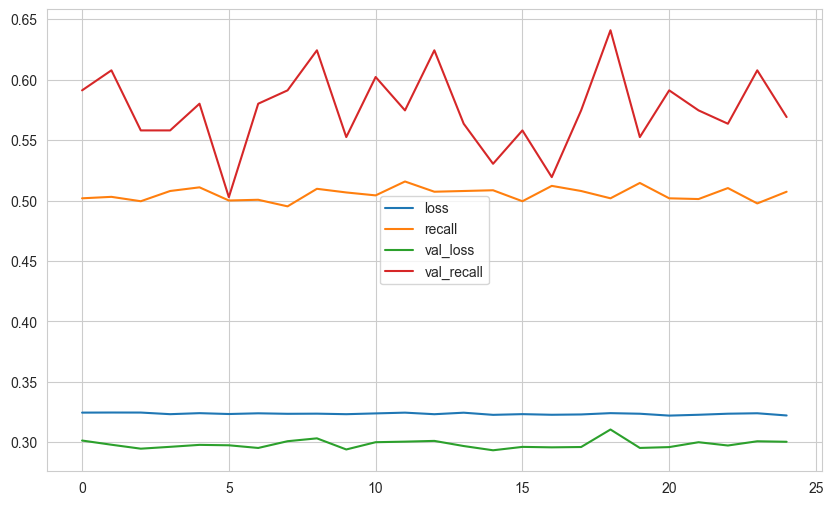

In [36]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[774  22]
 [108  96]]
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92       796
         1.0       0.81      0.47      0.60       204

    accuracy                           0.87      1000
   macro avg       0.85      0.72      0.76      1000
weighted avg       0.86      0.87      0.86      1000



32/32 [==============================] - 0s 2ms/step


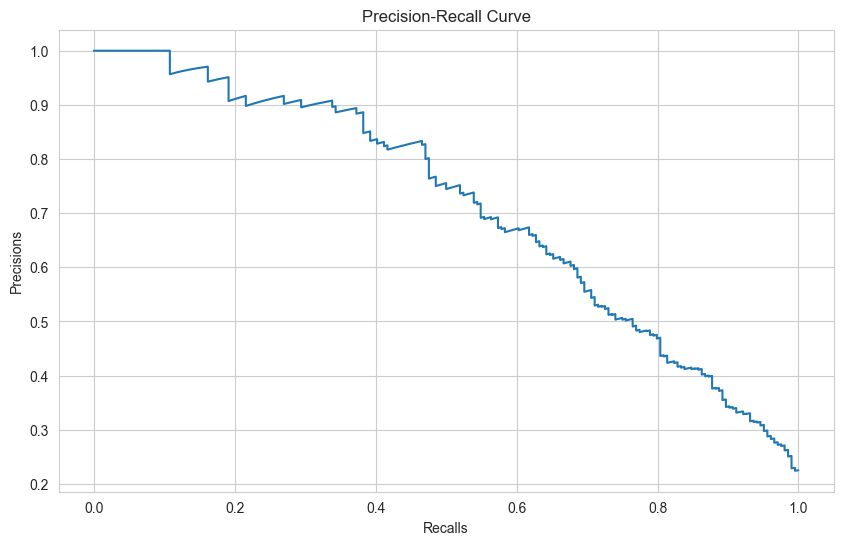

In [43]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label = "ANN")
plt.xlabel("Recalls")
plt.ylabel("Precisions")
plt.title("Precision-Recall Curve")
plt.show()

In [45]:
from sklearn.metrics import average_precision_score
average_precision_score(y_test, y_pred_proba)

0.7111258000863009

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [63]:
tf.random.set_seed(seed)
tf.keras.backend.clear_session()

model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(10, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(learning_rate = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [64]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight("balanced", classes = np.unique(y_train), y = y_train)
class_weights = {0 : class_weights[0], 1 : class_weights[1]}
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

class_weight.compute_class_weight fonksiyonu, dengesiz veri kümelerinde sınıflar arasındaki dengesizliği telafi etmek için sınıf ağırlıklarını hesaplamak için kullanılır. Bu fonksiyon, "balanced" parametresi ile çağrıldığında, sınıfların frekansına göre ağırlıkları otomatik olarak hesaplar.

Verilen değerler, sınıf ağırlıklarının sınıf etiketleriyle ilişkilendirildiği bir sözlük şeklinde temsil edilir. Örneğin, iki sınıfınız varsa ve class_weights değeri {0: 0.5, 1: 2.0} ise, sınıf 0 için ağırlık 0.5, sınıf 1 için ağırlık ise 2.0 olarak atanır.

Bu değerler, sınıf etiketlerinin dağılımına ve sınıflar arasındaki önem derecesine bağlı olarak belirlenir. Eğer bir sınıf diğerine göre daha az temsil ediliyorsa, ağırlığı artırarak bu sınıfın daha fazla öneme sahip olduğunu belirtiriz. Buna karşılık, daha sık temsil edilen sınıfın ağırlığı düşük olur.

Bu şekilde sınıf ağırlıklarını belirlemek, eğitim sürecinde dengesizlikleri telafi etmeye yardımcı olabilir ve daha iyi bir sınıflandırma performansı sağlayabilir.

In [65]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping callback oluşturma
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Modeli eğitim
model.fit(x=X_train, y=y_train, validation_split=0.1, batch_size=128, epochs=400, verbose=1,class_weight=class_weights, callbacks=[early_stopping])

Epoch 1/400
64/64 [==============================] - 2s 9ms/step - loss: 0.6952 - recall: 0.5666 - val_loss: 0.6932 - val_recall: 0.7072
Epoch 2/400
64/64 [==============================] - 0s 4ms/step - loss: 0.6677 - recall: 0.6320 - val_loss: 0.6585 - val_recall: 0.6740
Epoch 3/400
64/64 [==============================] - 0s 4ms/step - loss: 0.6432 - recall: 0.6356 - val_loss: 0.5983 - val_recall: 0.6409
Epoch 4/400
64/64 [==============================] - 0s 4ms/step - loss: 0.6247 - recall: 0.6459 - val_loss: 0.5620 - val_recall: 0.6464
Epoch 5/400
64/64 [==============================] - 0s 4ms/step - loss: 0.6102 - recall: 0.6646 - val_loss: 0.5901 - val_recall: 0.7238
Epoch 6/400
64/64 [==============================] - 0s 4ms/step - loss: 0.5969 - recall: 0.6731 - val_loss: 0.5343 - val_recall: 0.6685
Epoch 7/400
64/64 [==============================] - 0s 4ms/step - loss: 0.5867 - recall: 0.6828 - val_loss: 0.5574 - val_recall: 0.7293
Epoch 8/400
64/64 [======================

64/64 [==============================] - 1s 8ms/step - loss: 0.4698 - recall: 0.7579 - val_loss: 0.4277 - val_recall: 0.8232
Epoch 61/400
64/64 [==============================] - 0s 5ms/step - loss: 0.4708 - recall: 0.7579 - val_loss: 0.4369 - val_recall: 0.8232
Epoch 62/400
64/64 [==============================] - 0s 5ms/step - loss: 0.4687 - recall: 0.7603 - val_loss: 0.4714 - val_recall: 0.8453
Epoch 63/400
64/64 [==============================] - 0s 5ms/step - loss: 0.4682 - recall: 0.7536 - val_loss: 0.4430 - val_recall: 0.8232
Epoch 64/400
64/64 [==============================] - 0s 5ms/step - loss: 0.4701 - recall: 0.7415 - val_loss: 0.4619 - val_recall: 0.8508
Epoch 65/400
64/64 [==============================] - 0s 5ms/step - loss: 0.4677 - recall: 0.7567 - val_loss: 0.4037 - val_recall: 0.8066
Epoch 66/400
64/64 [==============================] - 0s 6ms/step - loss: 0.4704 - recall: 0.7561 - val_loss: 0.4959 - val_recall: 0.8508
Epoch 67/400
64/64 [===========================

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

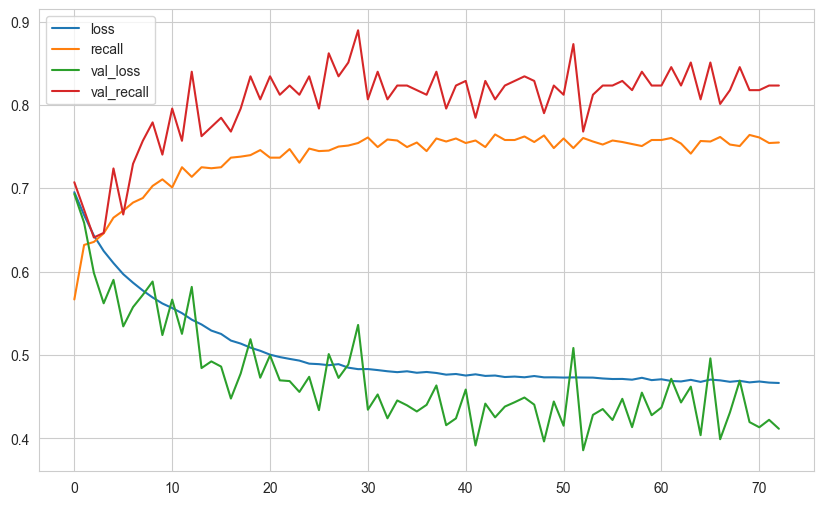

In [67]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [68]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[665 131]
 [ 63 141]]
              precision    recall  f1-score   support

         0.0       0.91      0.84      0.87       796
         1.0       0.52      0.69      0.59       204

    accuracy                           0.81      1000
   macro avg       0.72      0.76      0.73      1000
weighted avg       0.83      0.81      0.82      1000



32/32 [==============================] - 0s 2ms/step


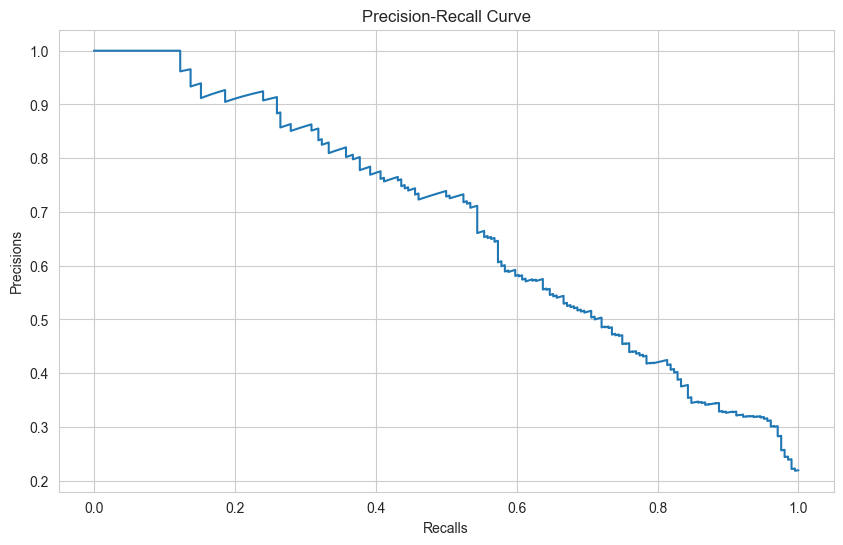

In [69]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label = "ANN")
plt.xlabel("Recalls")
plt.ylabel("Precisions")
plt.title("Precision-Recall Curve")
plt.show()

In [70]:
average_precision_score(y_test, y_pred_proba)

0.6750220543767153

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [72]:
tf.random.set_seed(seed)
tf.keras.backend.clear_session()

model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(10, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(learning_rate=0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [73]:
model.fit(x = X_train, 
          y = y_train, 
          validation_split = 0.1, 
          batch_size = 128, 
          epochs = 1000, 
          verbose = 1, 
          class_weight = class_weights)

Epoch 1/1000
64/64 [==============================] - 3s 10ms/step - loss: 0.6635 - recall: 0.5805 - val_loss: 0.6118 - val_recall: 0.6961
Epoch 2/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.6243 - recall: 0.6610 - val_loss: 0.6532 - val_recall: 0.8066
Epoch 3/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.5910 - recall: 0.6889 - val_loss: 0.5472 - val_recall: 0.7735
Epoch 4/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.5421 - recall: 0.7215 - val_loss: 0.5238 - val_recall: 0.8453
Epoch 5/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.5143 - recall: 0.7409 - val_loss: 0.4113 - val_recall: 0.7901
Epoch 6/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.5053 - recall: 0.7331 - val_loss: 0.4122 - val_recall: 0.7403
Epoch 7/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.4953 - recall: 0.7597 - val_loss: 0.4098 - val_recall: 0.8122
Epoch 8/1000
64/64 [=============

Epoch 60/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.4621 - recall: 0.7573 - val_loss: 0.4822 - val_recall: 0.8564
Epoch 61/1000
64/64 [==============================] - 0s 6ms/step - loss: 0.4623 - recall: 0.7663 - val_loss: 0.4444 - val_recall: 0.8287
Epoch 62/1000
64/64 [==============================] - 0s 6ms/step - loss: 0.4594 - recall: 0.7645 - val_loss: 0.4675 - val_recall: 0.8287
Epoch 63/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.4593 - recall: 0.7676 - val_loss: 0.4185 - val_recall: 0.8011
Epoch 64/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.4621 - recall: 0.7627 - val_loss: 0.4083 - val_recall: 0.8177
Epoch 65/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.4590 - recall: 0.7603 - val_loss: 0.4229 - val_recall: 0.8232
Epoch 66/1000
64/64 [==============================] - 1s 8ms/step - loss: 0.4583 - recall: 0.7603 - val_loss: 0.4832 - val_recall: 0.8453
Epoch 67/1000
64/64 [======

Epoch 119/1000
64/64 [==============================] - 0s 6ms/step - loss: 0.4462 - recall: 0.7645 - val_loss: 0.4195 - val_recall: 0.8122
Epoch 120/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.4462 - recall: 0.7554 - val_loss: 0.4522 - val_recall: 0.8232
Epoch 121/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.4430 - recall: 0.7712 - val_loss: 0.4885 - val_recall: 0.8398
Epoch 122/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.4521 - recall: 0.7645 - val_loss: 0.3808 - val_recall: 0.7624
Epoch 123/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.4466 - recall: 0.7567 - val_loss: 0.4237 - val_recall: 0.7845
Epoch 124/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.4424 - recall: 0.7591 - val_loss: 0.4513 - val_recall: 0.8122
Epoch 125/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.4462 - recall: 0.7669 - val_loss: 0.4446 - val_recall: 0.8287
Epoch 126/1000
64/64

64/64 [==============================] - 0s 5ms/step - loss: 0.4379 - recall: 0.7797 - val_loss: 0.4758 - val_recall: 0.8343
Epoch 178/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.4371 - recall: 0.7724 - val_loss: 0.4156 - val_recall: 0.7845
Epoch 179/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.4382 - recall: 0.7663 - val_loss: 0.4199 - val_recall: 0.8011
Epoch 180/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.4372 - recall: 0.7742 - val_loss: 0.4289 - val_recall: 0.8122
Epoch 181/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.4379 - recall: 0.7706 - val_loss: 0.4550 - val_recall: 0.8122
Epoch 182/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.4398 - recall: 0.7591 - val_loss: 0.4147 - val_recall: 0.7901
Epoch 183/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.4358 - recall: 0.7663 - val_loss: 0.4220 - val_recall: 0.8122
Epoch 184/1000
64/64 [=============

64/64 [==============================] - 0s 5ms/step - loss: 0.4289 - recall: 0.7742 - val_loss: 0.4470 - val_recall: 0.8177
Epoch 236/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.4290 - recall: 0.7803 - val_loss: 0.4490 - val_recall: 0.8011
Epoch 237/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.4274 - recall: 0.7827 - val_loss: 0.3858 - val_recall: 0.7624
Epoch 238/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.4329 - recall: 0.7791 - val_loss: 0.4520 - val_recall: 0.8232
Epoch 239/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.4284 - recall: 0.7881 - val_loss: 0.4320 - val_recall: 0.7790
Epoch 240/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.4337 - recall: 0.7791 - val_loss: 0.4266 - val_recall: 0.7956
Epoch 241/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.4279 - recall: 0.7881 - val_loss: 0.4224 - val_recall: 0.7624
Epoch 242/1000
64/64 [=============

64/64 [==============================] - 0s 5ms/step - loss: 0.4220 - recall: 0.7863 - val_loss: 0.4490 - val_recall: 0.7569
Epoch 294/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.4242 - recall: 0.7839 - val_loss: 0.4096 - val_recall: 0.7735
Epoch 295/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.4251 - recall: 0.7766 - val_loss: 0.3997 - val_recall: 0.7348
Epoch 296/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.4195 - recall: 0.7821 - val_loss: 0.4993 - val_recall: 0.8232
Epoch 297/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.4257 - recall: 0.7760 - val_loss: 0.4613 - val_recall: 0.8066
Epoch 298/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.4234 - recall: 0.7869 - val_loss: 0.4167 - val_recall: 0.7569
Epoch 299/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.4210 - recall: 0.7936 - val_loss: 0.4023 - val_recall: 0.7403
Epoch 300/1000
64/64 [=============

64/64 [==============================] - 0s 4ms/step - loss: 0.4189 - recall: 0.7984 - val_loss: 0.4299 - val_recall: 0.7459
Epoch 352/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.4159 - recall: 0.7845 - val_loss: 0.4655 - val_recall: 0.7790
Epoch 353/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.4196 - recall: 0.7881 - val_loss: 0.4340 - val_recall: 0.7569
Epoch 354/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.4213 - recall: 0.7881 - val_loss: 0.4696 - val_recall: 0.7845
Epoch 355/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.4153 - recall: 0.7936 - val_loss: 0.4324 - val_recall: 0.7459
Epoch 356/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.4157 - recall: 0.7936 - val_loss: 0.4464 - val_recall: 0.7624
Epoch 357/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.4142 - recall: 0.7912 - val_loss: 0.4301 - val_recall: 0.7459
Epoch 358/1000
64/64 [=============

64/64 [==============================] - 0s 4ms/step - loss: 0.4101 - recall: 0.7972 - val_loss: 0.4462 - val_recall: 0.7624
Epoch 410/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.4114 - recall: 0.7930 - val_loss: 0.4692 - val_recall: 0.7790
Epoch 411/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.4135 - recall: 0.8027 - val_loss: 0.4563 - val_recall: 0.7680
Epoch 412/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.4102 - recall: 0.8069 - val_loss: 0.4239 - val_recall: 0.7403
Epoch 413/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.4141 - recall: 0.7966 - val_loss: 0.4303 - val_recall: 0.7514
Epoch 414/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.4096 - recall: 0.7960 - val_loss: 0.4660 - val_recall: 0.7680
Epoch 415/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.4173 - recall: 0.7972 - val_loss: 0.4314 - val_recall: 0.7845
Epoch 416/1000
64/64 [=============

64/64 [==============================] - 0s 5ms/step - loss: 0.4052 - recall: 0.8087 - val_loss: 0.4439 - val_recall: 0.7680
Epoch 468/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.4076 - recall: 0.8045 - val_loss: 0.4503 - val_recall: 0.7514
Epoch 469/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.4058 - recall: 0.8099 - val_loss: 0.4304 - val_recall: 0.7514
Epoch 470/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.4091 - recall: 0.8021 - val_loss: 0.4253 - val_recall: 0.7569
Epoch 471/1000
64/64 [==============================] - 0s 6ms/step - loss: 0.4085 - recall: 0.8015 - val_loss: 0.4852 - val_recall: 0.8177
Epoch 472/1000
64/64 [==============================] - 0s 6ms/step - loss: 0.4083 - recall: 0.8021 - val_loss: 0.4323 - val_recall: 0.7459
Epoch 473/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.4086 - recall: 0.8015 - val_loss: 0.4665 - val_recall: 0.7956
Epoch 474/1000
64/64 [=============

64/64 [==============================] - 0s 5ms/step - loss: 0.4118 - recall: 0.8002 - val_loss: 0.4377 - val_recall: 0.7624
Epoch 526/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.4023 - recall: 0.8117 - val_loss: 0.4397 - val_recall: 0.7735
Epoch 527/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.4058 - recall: 0.8105 - val_loss: 0.4707 - val_recall: 0.7680
Epoch 528/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.4049 - recall: 0.8093 - val_loss: 0.4724 - val_recall: 0.8011
Epoch 529/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.4054 - recall: 0.8057 - val_loss: 0.4332 - val_recall: 0.7514
Epoch 530/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.4049 - recall: 0.8099 - val_loss: 0.4850 - val_recall: 0.8011
Epoch 531/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.4096 - recall: 0.8051 - val_loss: 0.4461 - val_recall: 0.7680
Epoch 532/1000
64/64 [=============

64/64 [==============================] - 0s 5ms/step - loss: 0.3990 - recall: 0.8111 - val_loss: 0.4774 - val_recall: 0.8122
Epoch 584/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.4119 - recall: 0.8117 - val_loss: 0.4294 - val_recall: 0.7569
Epoch 585/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.4023 - recall: 0.8111 - val_loss: 0.4303 - val_recall: 0.7514
Epoch 586/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.4062 - recall: 0.8117 - val_loss: 0.4173 - val_recall: 0.7348
Epoch 587/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.4023 - recall: 0.8008 - val_loss: 0.4449 - val_recall: 0.7956
Epoch 588/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.4012 - recall: 0.8178 - val_loss: 0.3967 - val_recall: 0.7348
Epoch 589/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.4013 - recall: 0.8045 - val_loss: 0.4586 - val_recall: 0.7735
Epoch 590/1000
64/64 [=============

64/64 [==============================] - 0s 5ms/step - loss: 0.4037 - recall: 0.8160 - val_loss: 0.4551 - val_recall: 0.8066
Epoch 642/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.4018 - recall: 0.8196 - val_loss: 0.4647 - val_recall: 0.8177
Epoch 643/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.4071 - recall: 0.8105 - val_loss: 0.4183 - val_recall: 0.7624
Epoch 644/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.4045 - recall: 0.8093 - val_loss: 0.4151 - val_recall: 0.7514
Epoch 645/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.4034 - recall: 0.8105 - val_loss: 0.4133 - val_recall: 0.7514
Epoch 646/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.4044 - recall: 0.8208 - val_loss: 0.4099 - val_recall: 0.7182
Epoch 647/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.4019 - recall: 0.8069 - val_loss: 0.4617 - val_recall: 0.7790
Epoch 648/1000
64/64 [=============

64/64 [==============================] - 0s 5ms/step - loss: 0.3990 - recall: 0.8202 - val_loss: 0.4299 - val_recall: 0.7569
Epoch 700/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.3999 - recall: 0.8196 - val_loss: 0.4451 - val_recall: 0.7735
Epoch 701/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.4029 - recall: 0.8160 - val_loss: 0.4852 - val_recall: 0.8066
Epoch 702/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.4015 - recall: 0.8166 - val_loss: 0.4143 - val_recall: 0.7569
Epoch 703/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.4025 - recall: 0.8160 - val_loss: 0.4436 - val_recall: 0.7735
Epoch 704/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.4039 - recall: 0.8196 - val_loss: 0.4282 - val_recall: 0.7514
Epoch 705/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.4028 - recall: 0.8111 - val_loss: 0.4672 - val_recall: 0.7790
Epoch 706/1000
64/64 [=============

64/64 [==============================] - 0s 5ms/step - loss: 0.4006 - recall: 0.8190 - val_loss: 0.4507 - val_recall: 0.7790
Epoch 758/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.4001 - recall: 0.8111 - val_loss: 0.4417 - val_recall: 0.7790
Epoch 759/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.3967 - recall: 0.8208 - val_loss: 0.4433 - val_recall: 0.7790
Epoch 760/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.3983 - recall: 0.8148 - val_loss: 0.4617 - val_recall: 0.8066
Epoch 761/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.4031 - recall: 0.8093 - val_loss: 0.4848 - val_recall: 0.8343
Epoch 762/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.4053 - recall: 0.8105 - val_loss: 0.4163 - val_recall: 0.7459
Epoch 763/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.3957 - recall: 0.8172 - val_loss: 0.4716 - val_recall: 0.7956
Epoch 764/1000
64/64 [=============

64/64 [==============================] - 0s 4ms/step - loss: 0.3942 - recall: 0.8190 - val_loss: 0.4380 - val_recall: 0.7624
Epoch 816/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.3938 - recall: 0.8202 - val_loss: 0.4647 - val_recall: 0.7901
Epoch 817/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.3996 - recall: 0.8178 - val_loss: 0.4279 - val_recall: 0.7293
Epoch 818/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.4008 - recall: 0.8111 - val_loss: 0.4605 - val_recall: 0.8122
Epoch 819/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.3965 - recall: 0.8172 - val_loss: 0.4292 - val_recall: 0.7459
Epoch 820/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.4024 - recall: 0.8093 - val_loss: 0.4791 - val_recall: 0.8122
Epoch 821/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.4021 - recall: 0.8172 - val_loss: 0.4233 - val_recall: 0.7680
Epoch 822/1000
64/64 [=============

64/64 [==============================] - 0s 4ms/step - loss: 0.3950 - recall: 0.8148 - val_loss: 0.4230 - val_recall: 0.7624
Epoch 874/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.4019 - recall: 0.8148 - val_loss: 0.4354 - val_recall: 0.7569
Epoch 875/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.3982 - recall: 0.8196 - val_loss: 0.4322 - val_recall: 0.7514
Epoch 876/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.3952 - recall: 0.8220 - val_loss: 0.4286 - val_recall: 0.7680
Epoch 877/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.3938 - recall: 0.8111 - val_loss: 0.4670 - val_recall: 0.7790
Epoch 878/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.3938 - recall: 0.8190 - val_loss: 0.4780 - val_recall: 0.7901
Epoch 879/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.3965 - recall: 0.8136 - val_loss: 0.4184 - val_recall: 0.7348
Epoch 880/1000
64/64 [=============

64/64 [==============================] - 0s 6ms/step - loss: 0.3941 - recall: 0.8148 - val_loss: 0.4589 - val_recall: 0.7735
Epoch 932/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.3928 - recall: 0.8190 - val_loss: 0.4509 - val_recall: 0.7569
Epoch 933/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.3954 - recall: 0.8257 - val_loss: 0.4453 - val_recall: 0.7514
Epoch 934/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.3989 - recall: 0.8148 - val_loss: 0.4449 - val_recall: 0.7735
Epoch 935/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.3952 - recall: 0.8148 - val_loss: 0.4695 - val_recall: 0.8122
Epoch 936/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.3989 - recall: 0.8196 - val_loss: 0.4433 - val_recall: 0.7790
Epoch 937/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.3987 - recall: 0.8117 - val_loss: 0.4318 - val_recall: 0.7459
Epoch 938/1000
64/64 [=============

64/64 [==============================] - 0s 5ms/step - loss: 0.3976 - recall: 0.8142 - val_loss: 0.4777 - val_recall: 0.8122
Epoch 990/1000
64/64 [==============================] - 0s 6ms/step - loss: 0.3937 - recall: 0.8214 - val_loss: 0.4673 - val_recall: 0.7403
Epoch 991/1000
64/64 [==============================] - 0s 6ms/step - loss: 0.3912 - recall: 0.8123 - val_loss: 0.4644 - val_recall: 0.7514
Epoch 992/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.3924 - recall: 0.8245 - val_loss: 0.4227 - val_recall: 0.7182
Epoch 993/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.3940 - recall: 0.8160 - val_loss: 0.4569 - val_recall: 0.7790
Epoch 994/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.3957 - recall: 0.8190 - val_loss: 0.4298 - val_recall: 0.7293
Epoch 995/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.3969 - recall: 0.8184 - val_loss: 0.4496 - val_recall: 0.7403
Epoch 996/1000
64/64 [=============

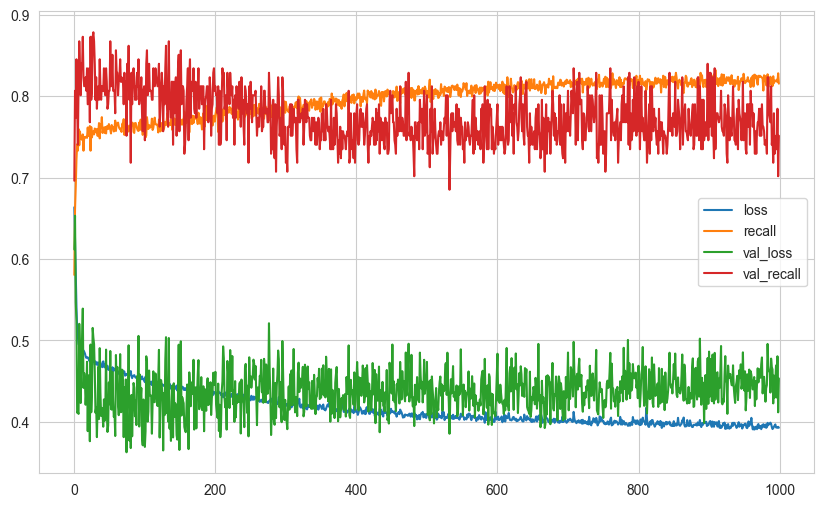

In [74]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [75]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 3ms/step
[[640 156]
 [ 51 153]]
              precision    recall  f1-score   support

         0.0       0.93      0.80      0.86       796
         1.0       0.50      0.75      0.60       204

    accuracy                           0.79      1000
   macro avg       0.71      0.78      0.73      1000
weighted avg       0.84      0.79      0.81      1000



### Add Dropout Layer

In [77]:
tf.random.set_seed(seed)
tf.keras.backend.clear_session()

model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5)) 
model.add(Dense(10, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(4, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(learning_rate= 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [78]:
model.fit(x = X_train, 
          y = y_train, 
          validation_split = 0.1, 
          batch_size = 128, 
          epochs = 300, 
          verbose = 1, 
          class_weight = class_weights)

Epoch 1/300
64/64 [==============================] - 3s 9ms/step - loss: 0.6974 - recall: 0.3172 - val_loss: 0.6776 - val_recall: 0.2707
Epoch 2/300
64/64 [==============================] - 0s 4ms/step - loss: 0.6882 - recall: 0.2676 - val_loss: 0.6802 - val_recall: 0.5414
Epoch 3/300
64/64 [==============================] - 0s 4ms/step - loss: 0.6857 - recall: 0.3408 - val_loss: 0.6689 - val_recall: 0.4530
Epoch 4/300
64/64 [==============================] - 0s 4ms/step - loss: 0.6767 - recall: 0.3868 - val_loss: 0.6513 - val_recall: 0.4088
Epoch 5/300
64/64 [==============================] - 0s 5ms/step - loss: 0.6750 - recall: 0.3565 - val_loss: 0.6464 - val_recall: 0.4862
Epoch 6/300
64/64 [==============================] - 0s 5ms/step - loss: 0.6665 - recall: 0.3832 - val_loss: 0.6285 - val_recall: 0.4530
Epoch 7/300
64/64 [==============================] - 0s 5ms/step - loss: 0.6574 - recall: 0.4558 - val_loss: 0.6081 - val_recall: 0.5525
Epoch 8/300
64/64 [======================

64/64 [==============================] - 0s 6ms/step - loss: 0.5807 - recall: 0.5521 - val_loss: 0.4821 - val_recall: 0.6685
Epoch 61/300
64/64 [==============================] - 0s 5ms/step - loss: 0.5887 - recall: 0.5212 - val_loss: 0.4985 - val_recall: 0.7127
Epoch 62/300
64/64 [==============================] - 0s 4ms/step - loss: 0.5834 - recall: 0.5357 - val_loss: 0.5243 - val_recall: 0.8066
Epoch 63/300
64/64 [==============================] - 0s 4ms/step - loss: 0.5920 - recall: 0.5230 - val_loss: 0.4980 - val_recall: 0.7238
Epoch 64/300
64/64 [==============================] - 0s 4ms/step - loss: 0.5837 - recall: 0.5212 - val_loss: 0.5166 - val_recall: 0.7569
Epoch 65/300
64/64 [==============================] - 0s 4ms/step - loss: 0.5837 - recall: 0.5387 - val_loss: 0.4938 - val_recall: 0.7182
Epoch 66/300
64/64 [==============================] - 0s 5ms/step - loss: 0.5796 - recall: 0.5351 - val_loss: 0.5039 - val_recall: 0.7680
Epoch 67/300
64/64 [===========================

64/64 [==============================] - 1s 12ms/step - loss: 0.5832 - recall: 0.5303 - val_loss: 0.5052 - val_recall: 0.7569
Epoch 120/300
64/64 [==============================] - 1s 11ms/step - loss: 0.5878 - recall: 0.5200 - val_loss: 0.5042 - val_recall: 0.7569
Epoch 121/300
64/64 [==============================] - 0s 7ms/step - loss: 0.5813 - recall: 0.5345 - val_loss: 0.5135 - val_recall: 0.7514
Epoch 122/300
64/64 [==============================] - 0s 6ms/step - loss: 0.5747 - recall: 0.5533 - val_loss: 0.5234 - val_recall: 0.7901
Epoch 123/300
64/64 [==============================] - 0s 5ms/step - loss: 0.5835 - recall: 0.5369 - val_loss: 0.4861 - val_recall: 0.6961
Epoch 124/300
64/64 [==============================] - 0s 6ms/step - loss: 0.5731 - recall: 0.5515 - val_loss: 0.4920 - val_recall: 0.6851
Epoch 125/300
64/64 [==============================] - 0s 6ms/step - loss: 0.5790 - recall: 0.5297 - val_loss: 0.5128 - val_recall: 0.7845
Epoch 126/300
64/64 [==================

64/64 [==============================] - 0s 7ms/step - loss: 0.5759 - recall: 0.5412 - val_loss: 0.5228 - val_recall: 0.7901
Epoch 179/300
64/64 [==============================] - 1s 8ms/step - loss: 0.5751 - recall: 0.5496 - val_loss: 0.4981 - val_recall: 0.7569
Epoch 180/300
64/64 [==============================] - 1s 9ms/step - loss: 0.5877 - recall: 0.4982 - val_loss: 0.5003 - val_recall: 0.7238
Epoch 181/300
64/64 [==============================] - 1s 8ms/step - loss: 0.5822 - recall: 0.5381 - val_loss: 0.4969 - val_recall: 0.6961
Epoch 182/300
64/64 [==============================] - 1s 10ms/step - loss: 0.5810 - recall: 0.5472 - val_loss: 0.4983 - val_recall: 0.7348
Epoch 183/300
64/64 [==============================] - 0s 8ms/step - loss: 0.5814 - recall: 0.5375 - val_loss: 0.4967 - val_recall: 0.7459
Epoch 184/300
64/64 [==============================] - 0s 7ms/step - loss: 0.5823 - recall: 0.5406 - val_loss: 0.4918 - val_recall: 0.7072
Epoch 185/300
64/64 [===================

64/64 [==============================] - 1s 9ms/step - loss: 0.5757 - recall: 0.5521 - val_loss: 0.4918 - val_recall: 0.6961
Epoch 238/300
64/64 [==============================] - 0s 7ms/step - loss: 0.5752 - recall: 0.5333 - val_loss: 0.4908 - val_recall: 0.7459
Epoch 239/300
64/64 [==============================] - 0s 7ms/step - loss: 0.5817 - recall: 0.5369 - val_loss: 0.4939 - val_recall: 0.7624
Epoch 240/300
64/64 [==============================] - 0s 7ms/step - loss: 0.5778 - recall: 0.5412 - val_loss: 0.5006 - val_recall: 0.7459
Epoch 241/300
64/64 [==============================] - 0s 6ms/step - loss: 0.5755 - recall: 0.5454 - val_loss: 0.4995 - val_recall: 0.7403
Epoch 242/300
64/64 [==============================] - 0s 6ms/step - loss: 0.5760 - recall: 0.5230 - val_loss: 0.5137 - val_recall: 0.7845
Epoch 243/300
64/64 [==============================] - 0s 7ms/step - loss: 0.5804 - recall: 0.5248 - val_loss: 0.4955 - val_recall: 0.7293
Epoch 244/300
64/64 [====================

64/64 [==============================] - 1s 8ms/step - loss: 0.5772 - recall: 0.5478 - val_loss: 0.4984 - val_recall: 0.7514
Epoch 297/300
64/64 [==============================] - 0s 8ms/step - loss: 0.5837 - recall: 0.5218 - val_loss: 0.4962 - val_recall: 0.7293
Epoch 298/300
64/64 [==============================] - 0s 7ms/step - loss: 0.5785 - recall: 0.5315 - val_loss: 0.5116 - val_recall: 0.7735
Epoch 299/300
64/64 [==============================] - 1s 8ms/step - loss: 0.5818 - recall: 0.5291 - val_loss: 0.5091 - val_recall: 0.7624
Epoch 300/300
64/64 [==============================] - 0s 7ms/step - loss: 0.5813 - recall: 0.5400 - val_loss: 0.4905 - val_recall: 0.7238


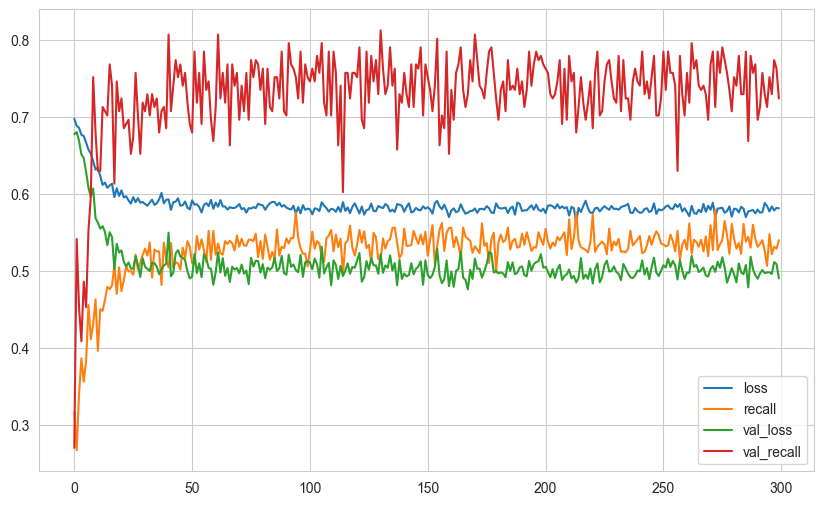

In [79]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [80]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 3ms/step
[[700  96]
 [ 76 128]]
              precision    recall  f1-score   support

         0.0       0.90      0.88      0.89       796
         1.0       0.57      0.63      0.60       204

    accuracy                           0.83      1000
   macro avg       0.74      0.75      0.74      1000
weighted avg       0.83      0.83      0.83      1000



### Add Early Stop

#### Monitor the "val_loss" as metric

In [81]:
tf.random.set_seed(seed)
tf.keras.backend.clear_session()

model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5)) 
model.add(Dense(10, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(4, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(learning_rate= 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])


In [82]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping callback oluşturma
early_stopping = EarlyStopping(monitor='val_loss', mode = "min",patience=50, restore_best_weights=True)

# Modeli eğitim
model.fit(x=X_train, y=y_train, validation_split=0.1, batch_size=128, epochs=1000, verbose=1,class_weight=class_weights, callbacks=[early_stopping])

Epoch 1/1000
64/64 [==============================] - 2s 10ms/step - loss: 0.7121 - recall: 0.8626 - val_loss: 0.6994 - val_recall: 1.0000
Epoch 2/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.6927 - recall: 0.9346 - val_loss: 0.6989 - val_recall: 1.0000
Epoch 3/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.6950 - recall: 0.9419 - val_loss: 0.6980 - val_recall: 1.0000
Epoch 4/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.6922 - recall: 0.9582 - val_loss: 0.6941 - val_recall: 0.9834
Epoch 5/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.6909 - recall: 0.1362 - val_loss: 0.6908 - val_recall: 0.1492
Epoch 6/1000
64/64 [==============================] - 0s 6ms/step - loss: 0.6799 - recall: 0.7815 - val_loss: 0.6725 - val_recall: 0.8177
Epoch 7/1000
64/64 [==============================] - 0s 6ms/step - loss: 0.6780 - recall: 0.7912 - val_loss: 0.6716 - val_recall: 0.8453
Epoch 8/1000
64/64 [=============

Epoch 60/1000
64/64 [==============================] - 0s 6ms/step - loss: 0.5952 - recall: 0.4764 - val_loss: 0.5093 - val_recall: 0.7790
Epoch 61/1000
64/64 [==============================] - 0s 7ms/step - loss: 0.5936 - recall: 0.4873 - val_loss: 0.5035 - val_recall: 0.7514
Epoch 62/1000
64/64 [==============================] - 0s 7ms/step - loss: 0.5817 - recall: 0.4849 - val_loss: 0.5102 - val_recall: 0.7735
Epoch 63/1000
64/64 [==============================] - 0s 6ms/step - loss: 0.5940 - recall: 0.4976 - val_loss: 0.4846 - val_recall: 0.7569
Epoch 64/1000
64/64 [==============================] - 0s 6ms/step - loss: 0.6024 - recall: 0.4794 - val_loss: 0.5257 - val_recall: 0.8177
Epoch 65/1000
64/64 [==============================] - 0s 7ms/step - loss: 0.5930 - recall: 0.4933 - val_loss: 0.4827 - val_recall: 0.7403
Epoch 66/1000
64/64 [==============================] - 0s 7ms/step - loss: 0.6019 - recall: 0.4637 - val_loss: 0.5143 - val_recall: 0.7459
Epoch 67/1000
64/64 [======

Epoch 119/1000
64/64 [==============================] - 0s 7ms/step - loss: 0.5939 - recall: 0.4824 - val_loss: 0.4689 - val_recall: 0.7901
Epoch 120/1000
64/64 [==============================] - 0s 6ms/step - loss: 0.5936 - recall: 0.4655 - val_loss: 0.5012 - val_recall: 0.8122
Epoch 121/1000
64/64 [==============================] - 0s 6ms/step - loss: 0.5912 - recall: 0.4843 - val_loss: 0.5117 - val_recall: 0.7901
Epoch 122/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.5960 - recall: 0.4600 - val_loss: 0.5193 - val_recall: 0.7569
Epoch 123/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.6012 - recall: 0.4528 - val_loss: 0.5390 - val_recall: 0.8066
Epoch 124/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.5853 - recall: 0.4764 - val_loss: 0.5133 - val_recall: 0.7790
Epoch 125/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.5867 - recall: 0.4613 - val_loss: 0.5296 - val_recall: 0.7735
Epoch 126/1000
64/64

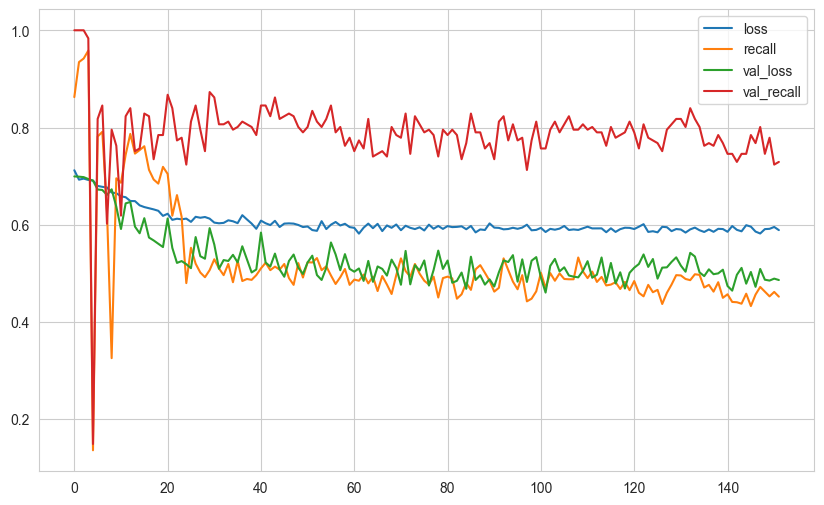

In [83]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [84]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[656 140]
 [ 68 136]]
              precision    recall  f1-score   support

         0.0       0.91      0.82      0.86       796
         1.0       0.49      0.67      0.57       204

    accuracy                           0.79      1000
   macro avg       0.70      0.75      0.71      1000
weighted avg       0.82      0.79      0.80      1000



#### Monitor the "val_recall" as metric

In [85]:
# Early stopping callback oluşturma
early_stopping = EarlyStopping(monitor='val_recall', mode = "max",patience=100, restore_best_weights=True)

# Modeli eğitim
model.fit(x=X_train, y=y_train, validation_split=0.1, batch_size=128, epochs=1000, verbose=1,class_weight=class_weights, callbacks=[early_stopping])

Epoch 1/1000
64/64 [==============================] - 0s 7ms/step - loss: 0.5869 - recall: 0.4885 - val_loss: 0.4735 - val_recall: 0.7735
Epoch 2/1000
64/64 [==============================] - 0s 6ms/step - loss: 0.5860 - recall: 0.4831 - val_loss: 0.5214 - val_recall: 0.8177
Epoch 3/1000
64/64 [==============================] - 0s 6ms/step - loss: 0.5858 - recall: 0.4885 - val_loss: 0.4716 - val_recall: 0.7680
Epoch 4/1000
64/64 [==============================] - 0s 6ms/step - loss: 0.5965 - recall: 0.4843 - val_loss: 0.4746 - val_recall: 0.7680
Epoch 5/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.5912 - recall: 0.4703 - val_loss: 0.5839 - val_recall: 0.8619
Epoch 6/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.5967 - recall: 0.5018 - val_loss: 0.4900 - val_recall: 0.7845
Epoch 7/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.5934 - recall: 0.4897 - val_loss: 0.5237 - val_recall: 0.8122
Epoch 8/1000
64/64 [==============

64/64 [==============================] - 1s 8ms/step - loss: 0.5850 - recall: 0.5291 - val_loss: 0.5165 - val_recall: 0.8398
Epoch 61/1000
64/64 [==============================] - 0s 6ms/step - loss: 0.5842 - recall: 0.5297 - val_loss: 0.4827 - val_recall: 0.8343
Epoch 62/1000
64/64 [==============================] - 0s 6ms/step - loss: 0.5960 - recall: 0.5097 - val_loss: 0.5166 - val_recall: 0.8287
Epoch 63/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.5878 - recall: 0.4806 - val_loss: 0.4908 - val_recall: 0.7901
Epoch 64/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.5846 - recall: 0.5163 - val_loss: 0.5192 - val_recall: 0.8177
Epoch 65/1000
64/64 [==============================] - 0s 6ms/step - loss: 0.5878 - recall: 0.5048 - val_loss: 0.4695 - val_recall: 0.7790
Epoch 66/1000
64/64 [==============================] - 0s 7ms/step - loss: 0.5888 - recall: 0.4703 - val_loss: 0.4897 - val_recall: 0.7956
Epoch 67/1000
64/64 [====================

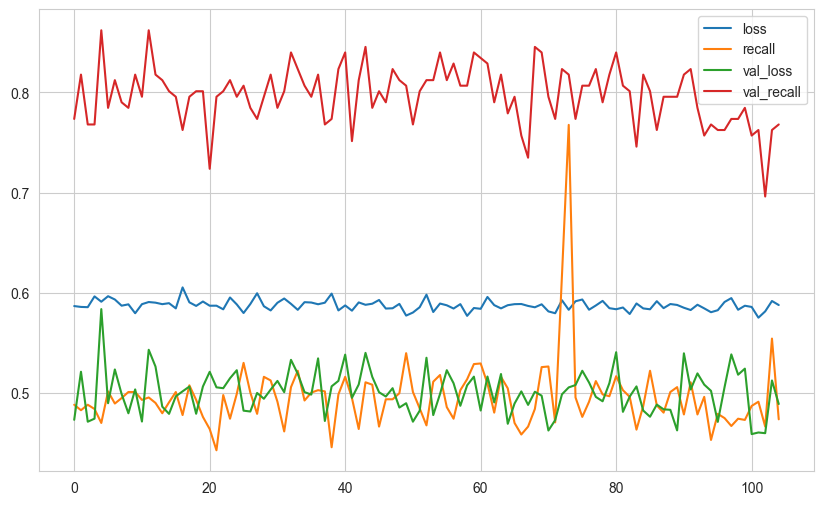

In [86]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [87]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 3ms/step
[[550 246]
 [ 42 162]]
              precision    recall  f1-score   support

         0.0       0.93      0.69      0.79       796
         1.0       0.40      0.79      0.53       204

    accuracy                           0.71      1000
   macro avg       0.66      0.74      0.66      1000
weighted avg       0.82      0.71      0.74      1000



## Optuna

In [100]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l1, l2, L1L2 





In [89]:
#!pip install optuna

In [90]:
import optuna

In [91]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [104]:
trial_metric = "Accuracy"
batch_size = 64

# batch_size = 64 model biraz daha hızlı eğitilsin diye batch_size'ı 32'den 64'e çıkardık

def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int("n_units1", 64, 128) # ilk layerda kaç tane nöron olsun 64'ten 128'e kadar dene diyoruz
    n_units2 = trial.suggest_int("n_units2", 16, 64)  # ama dikkat hepsini denemeyecek en iyiye doğru bir yönelimi olacak. 
    n_units3 = trial.suggest_int("n_units3", 16, 64)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam]) # optimizer olarak buradakileri dene
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-1) 
    regularizer1 = trial.suggest_loguniform("regularizer1", 1e-5, 1e-3)
    regularizer2 = trial.suggest_loguniform("regularizer2", 1e-5, 1e-3)
    dropout = trial.suggest_categorical("dropout",[0, .3, .5])
    
    # deneyeceğimiz hyperparametrelerin uzayını belirledik.
    # modeli aynı seed'de çalıştırarak

    tf.keras.utils.set_random_seed(seed)
    model = Sequential()
    model.add(Dense(n_units1,  
                    activation="relu", 
                    kernel_regularizer=L1L2(l1=regularizer1, l2=regularizer2), 
                    bias_regularizer=l2(regularizer2), 
                    activity_regularizer=l1(regularizer2), 
                    input_dim=X_train.shape[1],))
    model.add(Dropout(dropout))
    model.add(Dense(n_units2, 
                    activation="relu", 
                    kernel_regularizer=L1L2(l1=regularizer1, l2=regularizer2), 
                    bias_regularizer=l2(regularizer2), 
                    activity_regularizer=l1(regularizer2)))
    model.add(Dropout(dropout))
    model.add(Dense(n_units3,
                    activation="relu", 
                    kernel_regularizer=L1L2(l1=regularizer1, l2=regularizer2),
                    bias_regularizer=l2(regularizer2), 
                    activity_regularizer=l1(regularizer2)))
    model.add(Dropout(dropout))
    model.add(Dense(1, activation="sigmoid"))
   



    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric]
    )
    
    
    return model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5) # mimarinin içerisinde direk veremediğimiz bir hyperparametre-->(class_weight)
    w1 = trial.suggest_loguniform("w1", 0.01, 2) # daha var bunu fit içerisinde belirtebiliyoruz ondan dolayı burada tanımladık
                                                 # denenmesi için.
    model.fit(
        X_train,
        y_train,
        validation_split = 0.1,
        batch_size=batch_size,
        epochs=700,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    return model.evaluate(X_test, y_test, verbose=0)[1]

In [105]:
study = optuna.create_study(direction="maximize") # trial_metric = "Accuracy" olduğundan bunu maximize etmek istiyoruz.
study.optimize(objective, n_trials=15) # 15 trials denenecek istersek daha fazla da yazabiliriz.optimize edeceği :def objective
display(study.best_params)

[I 2023-05-16 02:23:44,353] A new study created in memory with name: no-name-ee6a94b0-9e91-4d43-93df-ca624edc8379


Restoring model weights from the end of the best epoch: 6.
Epoch 21: early stopping


[I 2023-05-16 02:23:58,572] Trial 0 finished with value: 0.20399999618530273 and parameters: {'n_units1': 75, 'n_units2': 44, 'n_units3': 20, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.0005328723569992195, 'regularizer1': 0.0004889908202425836, 'regularizer2': 6.289833569093704e-05, 'dropout': 0.5, 'w0': 0.04471745207499444, 'w1': 1.135780128783029}. Best is trial 0 with value: 0.20399999618530273.


Restoring model weights from the end of the best epoch: 37.
Epoch 52: early stopping


[I 2023-05-16 02:24:44,907] Trial 1 finished with value: 0.8159999847412109 and parameters: {'n_units1': 128, 'n_units2': 25, 'n_units3': 62, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 0.0012163477188401454, 'regularizer1': 2.9010786684618725e-05, 'regularizer2': 5.339534036144172e-05, 'dropout': 0.3, 'w0': 1.8482753972720427, 'w1': 0.20271382463093596}. Best is trial 1 with value: 0.8159999847412109.


Restoring model weights from the end of the best epoch: 7.
Epoch 22: early stopping


[I 2023-05-16 02:25:10,410] Trial 2 finished with value: 0.20399999618530273 and parameters: {'n_units1': 103, 'n_units2': 57, 'n_units3': 61, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 0.0686145537472071, 'regularizer1': 0.0004114266975595311, 'regularizer2': 0.00025368758324512694, 'dropout': 0, 'w0': 0.03859699980192104, 'w1': 0.6025207482468762}. Best is trial 1 with value: 0.8159999847412109.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-05-16 02:25:33,886] Trial 3 finished with value: 0.7960000038146973 and parameters: {'n_units1': 90, 'n_units2': 34, 'n_units3': 32, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.00022453625742982608, 'regularizer1': 2.262675702250411e-05, 'regularizer2': 0.00017254010759242826, 'dropout': 0.3, 'w0': 1.5029743601663854, 'w1': 0.10912163391150116}. Best is trial 1 with value: 0.8159999847412109.


Restoring model weights from the end of the best epoch: 66.
Epoch 81: early stopping


[I 2023-05-16 02:26:30,660] Trial 4 finished with value: 0.8169999718666077 and parameters: {'n_units1': 83, 'n_units2': 61, 'n_units3': 29, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 0.0006817972855094659, 'regularizer1': 1.0230711045384171e-05, 'regularizer2': 2.10824522709741e-05, 'dropout': 0.5, 'w0': 1.855986445929066, 'w1': 0.17066358417129357}. Best is trial 4 with value: 0.8169999718666077.


Restoring model weights from the end of the best epoch: 23.
Epoch 38: early stopping


[I 2023-05-16 02:27:15,659] Trial 5 finished with value: 0.7960000038146973 and parameters: {'n_units1': 102, 'n_units2': 42, 'n_units3': 50, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.0003259821426542354, 'regularizer1': 0.00021974207502962833, 'regularizer2': 6.679890021643162e-05, 'dropout': 0.3, 'w0': 0.031643281212939606, 'w1': 0.07538750103881936}. Best is trial 4 with value: 0.8169999718666077.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-05-16 02:27:27,790] Trial 6 finished with value: 0.7960000038146973 and parameters: {'n_units1': 85, 'n_units2': 40, 'n_units3': 50, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.06957021810612316, 'regularizer1': 1.24444881421445e-05, 'regularizer2': 0.0002901223768937992, 'dropout': 0.3, 'w0': 3.9322099531742483, 'w1': 0.18729903471263132}. Best is trial 4 with value: 0.8169999718666077.


Restoring model weights from the end of the best epoch: 8.
Epoch 23: early stopping


[I 2023-05-16 02:27:43,456] Trial 7 finished with value: 0.7960000038146973 and parameters: {'n_units1': 80, 'n_units2': 60, 'n_units3': 18, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.06225289384473294, 'regularizer1': 0.00015876456346895272, 'regularizer2': 0.0005695577959677115, 'dropout': 0.3, 'w0': 0.21007673275830133, 'w1': 0.10193377659600576}. Best is trial 4 with value: 0.8169999718666077.


Restoring model weights from the end of the best epoch: 2.
Epoch 17: early stopping


[I 2023-05-16 02:27:56,169] Trial 8 finished with value: 0.7960000038146973 and parameters: {'n_units1': 99, 'n_units2': 49, 'n_units3': 37, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.003926441861633395, 'regularizer1': 0.0004987855951858819, 'regularizer2': 0.00010922495105248871, 'dropout': 0.3, 'w0': 0.021465552926400767, 'w1': 0.01426305245838163}. Best is trial 4 with value: 0.8169999718666077.


Restoring model weights from the end of the best epoch: 2.
Epoch 17: early stopping


[I 2023-05-16 02:28:09,469] Trial 9 finished with value: 0.7960000038146973 and parameters: {'n_units1': 85, 'n_units2': 51, 'n_units3': 50, 'optimizer': <class 'keras.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.04963117790491022, 'regularizer1': 0.00011998202579218373, 'regularizer2': 0.0006738543624652594, 'dropout': 0.3, 'w0': 1.758971841549273, 'w1': 0.01550906299665317}. Best is trial 4 with value: 0.8169999718666077.
[I 2023-05-16 02:35:56,618] Trial 10 finished with value: 0.8450000286102295 and parameters: {'n_units1': 65, 'n_units2': 64, 'n_units3': 27, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 2.1868643660918308e-05, 'regularizer1': 6.415156092730305e-05, 'regularizer2': 1.3433317102790134e-05, 'dropout': 0.5, 'w0': 0.3670356825935167, 'w1': 0.4616739657036783}. Best is trial 10 with value: 0.8450000286102295.
[I 2023-05-16 02:43:39,424] Trial 11 finished with value: 0.7960000038146973 and parameters: {'n_units1': 64, 'n_units2': 63, 'n_unit

Restoring model weights from the end of the best epoch: 431.
Epoch 446: early stopping


[I 2023-05-16 02:48:26,965] Trial 12 finished with value: 0.6549999713897705 and parameters: {'n_units1': 64, 'n_units2': 64, 'n_units3': 26, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 1.858953284516409e-05, 'regularizer1': 1.1351477635385572e-05, 'regularizer2': 1.0223701578522654e-05, 'dropout': 0.5, 'w0': 0.36913255245892174, 'w1': 1.7188053286015206}. Best is trial 10 with value: 0.8450000286102295.


Restoring model weights from the end of the best epoch: 546.
Epoch 561: early stopping


[I 2023-05-16 02:55:54,892] Trial 13 finished with value: 0.7860000133514404 and parameters: {'n_units1': 72, 'n_units2': 16, 'n_units3': 39, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 3.2912385658164975e-05, 'regularizer1': 6.408815272069163e-05, 'regularizer2': 2.35327102854432e-05, 'dropout': 0.5, 'w0': 0.1576197336528159, 'w1': 0.4043279479036879}. Best is trial 10 with value: 0.8450000286102295.


Restoring model weights from the end of the best epoch: 4.
Epoch 19: early stopping


[I 2023-05-16 02:56:09,762] Trial 14 finished with value: 0.7960000038146973 and parameters: {'n_units1': 119, 'n_units2': 54, 'n_units3': 24, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 5.82521764582789e-05, 'regularizer1': 6.206772339223686e-05, 'regularizer2': 2.284600510672295e-05, 'dropout': 0.5, 'w0': 0.6209127135603659, 'w1': 0.04544721138106646}. Best is trial 10 with value: 0.8450000286102295.


{'n_units1': 65,
 'n_units2': 64,
 'n_units3': 27,
 'optimizer': keras.optimizers.nadam.Nadam,
 'learning_rate': 2.1868643660918308e-05,
 'regularizer1': 6.415156092730305e-05,
 'regularizer2': 1.3433317102790134e-05,
 'dropout': 0.5,
 'w0': 0.3670356825935167,
 'w1': 0.4616739657036783}

In [106]:
unit1, unit2, unit3, optimizer, lr, lreg1, lreg2, dropout_rate, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["n_units3"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["regularizer1"],
    study.best_params["regularizer2"],
    study.best_params["dropout"],
    study.best_params["w0"],
    study.best_params["w1"],
)

tf.keras.utils.set_random_seed(seed)
model = Sequential()
model.add(Dense(unit1, 
                activation="relu", 
                kernel_regularizer=L1L2(l1=lreg1, l2=lreg2), 
                bias_regularizer=l2(lreg2), 
                activity_regularizer=l2(lreg2)))
model.add(Dropout(dropout_rate))
model.add(Dense(unit2, 
                activation="relu", 
                kernel_regularizer=L1L2(l1=lreg1, l2=lreg2), 
                bias_regularizer=l2(lreg2), 
                activity_regularizer=l2(lreg2)))
model.add(Dropout(dropout_rate))
model.add(Dense(unit3, 
                activation="relu", 
                kernel_regularizer=L1L2(l1=lreg1, l2=lreg2), 
                bias_regularizer=l2(lreg2), 
                activity_regularizer=l2(lreg2)))
model.add(Dropout(dropout_rate))
model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Accuracy"])

# train model
model.fit(
    X_train,
    y_train,
    validation_split = 0.1,
    batch_size=64,
    epochs=500,
    callbacks=[early_stop],
    verbose=1,
)

Epoch 1/500
127/127 [==============================] - 6s 11ms/step - loss: 0.8230 - Accuracy: 0.3770 - val_loss: 0.7576 - val_Accuracy: 0.3833
Epoch 2/500
127/127 [==============================] - 1s 7ms/step - loss: 0.7876 - Accuracy: 0.4359 - val_loss: 0.7326 - val_Accuracy: 0.5878
Epoch 3/500
127/127 [==============================] - 1s 6ms/step - loss: 0.7599 - Accuracy: 0.4967 - val_loss: 0.7094 - val_Accuracy: 0.7689
Epoch 4/500
127/127 [==============================] - 1s 6ms/step - loss: 0.7312 - Accuracy: 0.5611 - val_loss: 0.6886 - val_Accuracy: 0.7989
Epoch 5/500
127/127 [==============================] - 1s 5ms/step - loss: 0.7116 - Accuracy: 0.6101 - val_loss: 0.6683 - val_Accuracy: 0.7989
Epoch 6/500
127/127 [==============================] - 1s 6ms/step - loss: 0.6918 - Accuracy: 0.6523 - val_loss: 0.6495 - val_Accuracy: 0.7989
Epoch 7/500
127/127 [==============================] - 1s 5ms/step - loss: 0.6748 - Accuracy: 0.6878 - val_loss: 0.6321 - val_Accuracy: 0.798

Epoch 58/500
127/127 [==============================] - 1s 6ms/step - loss: 0.5540 - Accuracy: 0.7957 - val_loss: 0.5122 - val_Accuracy: 0.7989
Epoch 59/500
127/127 [==============================] - 1s 6ms/step - loss: 0.5511 - Accuracy: 0.7957 - val_loss: 0.5116 - val_Accuracy: 0.7989
Epoch 60/500
127/127 [==============================] - 1s 6ms/step - loss: 0.5548 - Accuracy: 0.7958 - val_loss: 0.5115 - val_Accuracy: 0.7989
Epoch 61/500
127/127 [==============================] - 1s 6ms/step - loss: 0.5523 - Accuracy: 0.7954 - val_loss: 0.5112 - val_Accuracy: 0.7989
Epoch 62/500
127/127 [==============================] - 1s 6ms/step - loss: 0.5482 - Accuracy: 0.7957 - val_loss: 0.5108 - val_Accuracy: 0.7989
Epoch 63/500
127/127 [==============================] - 1s 6ms/step - loss: 0.5492 - Accuracy: 0.7957 - val_loss: 0.5103 - val_Accuracy: 0.7989
Epoch 64/500
127/127 [==============================] - 1s 5ms/step - loss: 0.5485 - Accuracy: 0.7959 - val_loss: 0.5100 - val_Accuracy:

Epoch 115/500
127/127 [==============================] - 1s 5ms/step - loss: 0.5288 - Accuracy: 0.7962 - val_loss: 0.4936 - val_Accuracy: 0.7989
Epoch 116/500
127/127 [==============================] - 1s 6ms/step - loss: 0.5307 - Accuracy: 0.7960 - val_loss: 0.4935 - val_Accuracy: 0.7989
Epoch 117/500
127/127 [==============================] - 1s 5ms/step - loss: 0.5284 - Accuracy: 0.7960 - val_loss: 0.4933 - val_Accuracy: 0.7989
Epoch 118/500
127/127 [==============================] - 1s 5ms/step - loss: 0.5276 - Accuracy: 0.7959 - val_loss: 0.4930 - val_Accuracy: 0.7989
Epoch 119/500
127/127 [==============================] - 1s 5ms/step - loss: 0.5268 - Accuracy: 0.7960 - val_loss: 0.4926 - val_Accuracy: 0.7989
Epoch 120/500
127/127 [==============================] - 1s 6ms/step - loss: 0.5224 - Accuracy: 0.7960 - val_loss: 0.4921 - val_Accuracy: 0.7989
Epoch 121/500
127/127 [==============================] - 1s 5ms/step - loss: 0.5239 - Accuracy: 0.7960 - val_loss: 0.4917 - val_Ac

127/127 [==============================] - 1s 6ms/step - loss: 0.5146 - Accuracy: 0.7959 - val_loss: 0.4804 - val_Accuracy: 0.7989
Epoch 172/500
127/127 [==============================] - 1s 6ms/step - loss: 0.5156 - Accuracy: 0.7962 - val_loss: 0.4803 - val_Accuracy: 0.7989
Epoch 173/500
127/127 [==============================] - 1s 6ms/step - loss: 0.5142 - Accuracy: 0.7959 - val_loss: 0.4800 - val_Accuracy: 0.7989
Epoch 174/500
127/127 [==============================] - 1s 6ms/step - loss: 0.5138 - Accuracy: 0.7960 - val_loss: 0.4799 - val_Accuracy: 0.7989
Epoch 175/500
127/127 [==============================] - 1s 5ms/step - loss: 0.5137 - Accuracy: 0.7960 - val_loss: 0.4795 - val_Accuracy: 0.7989
Epoch 176/500
127/127 [==============================] - 1s 5ms/step - loss: 0.5118 - Accuracy: 0.7960 - val_loss: 0.4791 - val_Accuracy: 0.7989
Epoch 177/500
127/127 [==============================] - 1s 5ms/step - loss: 0.5127 - Accuracy: 0.7960 - val_loss: 0.4788 - val_Accuracy: 0.7989

127/127 [==============================] - 1s 5ms/step - loss: 0.5050 - Accuracy: 0.7960 - val_loss: 0.4687 - val_Accuracy: 0.7989
Epoch 228/500
127/127 [==============================] - 1s 5ms/step - loss: 0.5044 - Accuracy: 0.7967 - val_loss: 0.4687 - val_Accuracy: 0.7989
Epoch 229/500
127/127 [==============================] - 1s 6ms/step - loss: 0.5043 - Accuracy: 0.7960 - val_loss: 0.4683 - val_Accuracy: 0.7989
Epoch 230/500
127/127 [==============================] - 1s 5ms/step - loss: 0.5062 - Accuracy: 0.7960 - val_loss: 0.4684 - val_Accuracy: 0.7989
Epoch 231/500
127/127 [==============================] - 1s 5ms/step - loss: 0.5082 - Accuracy: 0.7960 - val_loss: 0.4683 - val_Accuracy: 0.7989
Epoch 232/500
127/127 [==============================] - 1s 6ms/step - loss: 0.5019 - Accuracy: 0.7964 - val_loss: 0.4681 - val_Accuracy: 0.7989
Epoch 233/500
127/127 [==============================] - 1s 6ms/step - loss: 0.5013 - Accuracy: 0.7962 - val_loss: 0.4677 - val_Accuracy: 0.7989

127/127 [==============================] - 1s 6ms/step - loss: 0.4931 - Accuracy: 0.7965 - val_loss: 0.4571 - val_Accuracy: 0.7989
Epoch 284/500
127/127 [==============================] - 1s 5ms/step - loss: 0.4904 - Accuracy: 0.7969 - val_loss: 0.4567 - val_Accuracy: 0.7989
Epoch 285/500
127/127 [==============================] - 1s 5ms/step - loss: 0.4925 - Accuracy: 0.7972 - val_loss: 0.4565 - val_Accuracy: 0.7989
Epoch 286/500
127/127 [==============================] - 1s 5ms/step - loss: 0.4891 - Accuracy: 0.7960 - val_loss: 0.4561 - val_Accuracy: 0.7989
Epoch 287/500
127/127 [==============================] - 1s 5ms/step - loss: 0.4947 - Accuracy: 0.7968 - val_loss: 0.4562 - val_Accuracy: 0.7989
Epoch 288/500
127/127 [==============================] - 1s 6ms/step - loss: 0.4867 - Accuracy: 0.7964 - val_loss: 0.4558 - val_Accuracy: 0.7989
Epoch 289/500
127/127 [==============================] - 1s 6ms/step - loss: 0.4887 - Accuracy: 0.7962 - val_loss: 0.4555 - val_Accuracy: 0.7989

127/127 [==============================] - 1s 6ms/step - loss: 0.4849 - Accuracy: 0.7993 - val_loss: 0.4460 - val_Accuracy: 0.7989
Epoch 340/500
127/127 [==============================] - 1s 6ms/step - loss: 0.4826 - Accuracy: 0.7983 - val_loss: 0.4457 - val_Accuracy: 0.7989
Epoch 341/500
127/127 [==============================] - 1s 6ms/step - loss: 0.4840 - Accuracy: 0.7981 - val_loss: 0.4455 - val_Accuracy: 0.7989
Epoch 342/500
127/127 [==============================] - 1s 6ms/step - loss: 0.4892 - Accuracy: 0.7960 - val_loss: 0.4456 - val_Accuracy: 0.7989
Epoch 343/500
127/127 [==============================] - 1s 6ms/step - loss: 0.4832 - Accuracy: 0.7979 - val_loss: 0.4453 - val_Accuracy: 0.7989
Epoch 344/500
127/127 [==============================] - 1s 5ms/step - loss: 0.4866 - Accuracy: 0.7980 - val_loss: 0.4451 - val_Accuracy: 0.7989
Epoch 345/500
127/127 [==============================] - 1s 5ms/step - loss: 0.4837 - Accuracy: 0.7977 - val_loss: 0.4450 - val_Accuracy: 0.7989

127/127 [==============================] - 1s 6ms/step - loss: 0.4726 - Accuracy: 0.8033 - val_loss: 0.4346 - val_Accuracy: 0.8089
Epoch 396/500
127/127 [==============================] - 1s 6ms/step - loss: 0.4748 - Accuracy: 0.7999 - val_loss: 0.4345 - val_Accuracy: 0.8089
Epoch 397/500
127/127 [==============================] - 1s 6ms/step - loss: 0.4709 - Accuracy: 0.8051 - val_loss: 0.4342 - val_Accuracy: 0.8089
Epoch 398/500
127/127 [==============================] - 1s 6ms/step - loss: 0.4751 - Accuracy: 0.7986 - val_loss: 0.4339 - val_Accuracy: 0.8100
Epoch 399/500
127/127 [==============================] - 1s 6ms/step - loss: 0.4727 - Accuracy: 0.8015 - val_loss: 0.4337 - val_Accuracy: 0.8100
Epoch 400/500
127/127 [==============================] - 1s 6ms/step - loss: 0.4710 - Accuracy: 0.8022 - val_loss: 0.4334 - val_Accuracy: 0.8100
Epoch 401/500
127/127 [==============================] - 1s 6ms/step - loss: 0.4724 - Accuracy: 0.8009 - val_loss: 0.4332 - val_Accuracy: 0.8100

127/127 [==============================] - 1s 6ms/step - loss: 0.4648 - Accuracy: 0.8049 - val_loss: 0.4228 - val_Accuracy: 0.8278
Epoch 452/500
127/127 [==============================] - 1s 6ms/step - loss: 0.4662 - Accuracy: 0.8040 - val_loss: 0.4226 - val_Accuracy: 0.8300
Epoch 453/500
127/127 [==============================] - 1s 6ms/step - loss: 0.4620 - Accuracy: 0.8056 - val_loss: 0.4223 - val_Accuracy: 0.8311
Epoch 454/500
127/127 [==============================] - 1s 6ms/step - loss: 0.4681 - Accuracy: 0.8022 - val_loss: 0.4221 - val_Accuracy: 0.8300
Epoch 455/500
127/127 [==============================] - 1s 6ms/step - loss: 0.4638 - Accuracy: 0.8032 - val_loss: 0.4218 - val_Accuracy: 0.8289
Epoch 456/500
127/127 [==============================] - 1s 6ms/step - loss: 0.4651 - Accuracy: 0.8043 - val_loss: 0.4216 - val_Accuracy: 0.8311
Epoch 457/500
127/127 [==============================] - 1s 5ms/step - loss: 0.4636 - Accuracy: 0.8042 - val_loss: 0.4212 - val_Accuracy: 0.8311

In [107]:
history = model.history.history

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

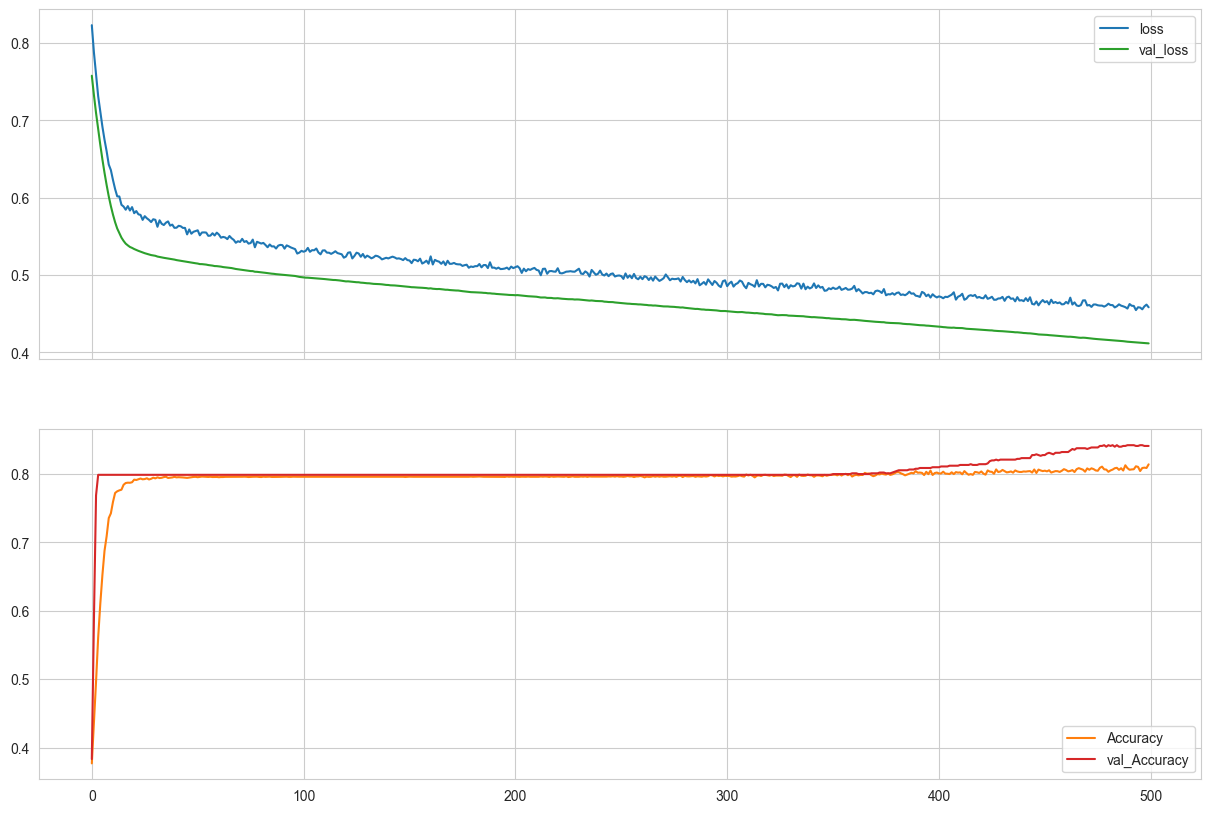

In [108]:
loss_df = pd.DataFrame(history)
loss_df.plot(subplots=[["loss","val_loss"],["Accuracy","val_Accuracy"]], layout=(2,1),figsize=(15,10))
plt.show()

In [109]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 3ms/step
[[783  13]
 [161  43]]
              precision    recall  f1-score   support

         0.0       0.83      0.98      0.90       796
         1.0       0.77      0.21      0.33       204

    accuracy                           0.83      1000
   macro avg       0.80      0.60      0.62      1000
weighted avg       0.82      0.83      0.78      1000



In [110]:
average_precision_score(y_test, y_pred_proba)

0.6750220543767153

32/32 [==============================] - 0s 3ms/step


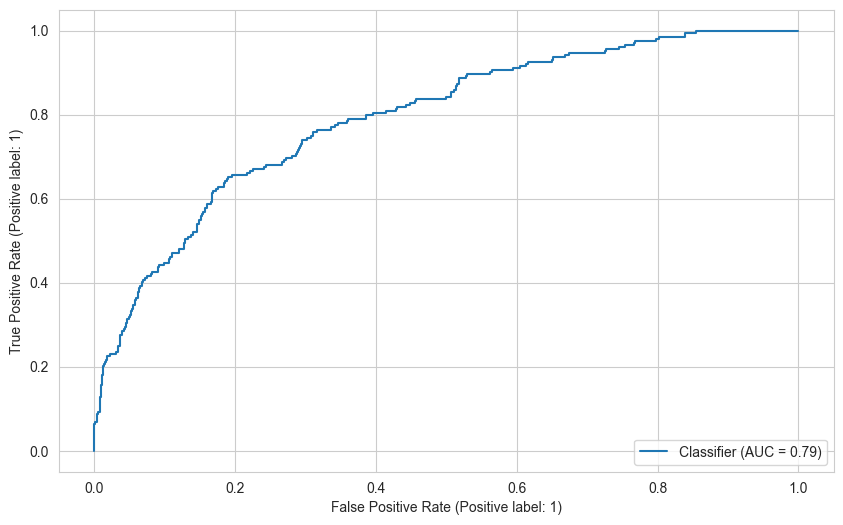

In [113]:
from sklearn.metrics import plot_roc_curve, RocCurveDisplay

y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [114]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.4388178586959839
accuracy:  0.8259999752044678


In [116]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred_proba)

0.7920915853778697

# Final Model and Model Deployment

In [121]:
import pickle
pickle.dump(transformer, open("transformer_churn", "wb"))
pickle.dump(scaler, open("scaler_churn", "wb"))

In [122]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 3ms/step
[[783  13]
 [161  43]]
              precision    recall  f1-score   support

         0.0       0.83      0.98      0.90       796
         1.0       0.77      0.21      0.33       204

    accuracy                           0.83      1000
   macro avg       0.80      0.60      0.62      1000
weighted avg       0.82      0.83      0.78      1000



In [123]:
model.save("model.churn.h5")

## Prediction

In [124]:
single_customer = df.drop(columns = "Exited").iloc[0]
single_customer

onehotencoder__x0_France         1.000
onehotencoder__x0_Germany        0.000
onehotencoder__x0_Spain          0.000
onehotencoder__x1_Female         1.000
onehotencoder__x1_Male           0.000
CreditScore                    619.000
Age                             42.000
Tenure                           2.000
Balance                          0.000
NumOfProducts                    1.000
HasCrCard                        1.000
IsActiveMember                   1.000
EstimatedSalary             101348.880
Name: 0, dtype: float64

In [125]:
single_customer = scaler.transform(single_customer.values.reshape(-1, 13))
single_customer

array([[1.        , 0.        , 0.        , 1.        , 0.        ,
        0.538     , 0.32432432, 0.2       , 0.        , 0.        ,
        1.        , 1.        , 0.50673489]])

In [126]:
model.predict(single_customer)

1/1 [==============================] - 0s 51ms/step


array([[0.17001435]], dtype=float32)

In [127]:
df["Exited"].iloc[0]

1.0

In [128]:
X_train, X_test, y_train, y_test = train_test_split( X, y, stratify=y, test_size=0.1, random_state=seed)

In [129]:
from sklearn.linear_model import LogisticRegression

In [130]:
log_model=LogisticRegression()
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[796   0]
 [204   0]]
              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89       796
         1.0       0.00      0.00      0.00       204

    accuracy                           0.80      1000
   macro avg       0.40      0.50      0.44      1000
weighted avg       0.63      0.80      0.71      1000



In [131]:
from sklearn.ensemble import RandomForestClassifier

In [132]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[763  33]
 [119  85]]
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91       796
         1.0       0.72      0.42      0.53       204

    accuracy                           0.85      1000
   macro avg       0.79      0.69      0.72      1000
weighted avg       0.84      0.85      0.83      1000



___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___